# PTB-XL ECG Dataset Analysis

This notebook analyzes the PTB-XL dataset, a large publicly available electrocardiography dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

# Enable inline plotting in Jupyter
%matplotlib inline

In [2]:
import os
import shutil
import kagglehub

# Download dataset using kagglehub
path = kagglehub.dataset_download("khyeh0719/ptb-xl-dataset")
print("Original path to dataset files:", path)

# Define DATA_PATH to point to the downloaded dataset
DATA_PATH = '/content/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1' # Local dataset path

100%|██████████| 1.72G/1.72G [00:46<00:00, 39.6MB/s]

Extracting files...


Original path to dataset files: /root/.cache/kagglehub/datasets/khyeh0719/ptb-xl-dataset/versions/1


In [3]:
import shutil
import os

source_dir = '/root/.cache/kagglehub/datasets/khyeh0719/ptb-xl-dataset/versions/1'
destination_dir = '/content/ptbxl/'

# Ensure the destination directory exists, create if not
os.makedirs(destination_dir, exist_ok=True)

# Move the entire directory
shutil.move(source_dir, destination_dir)

print(f"Dataset moved from '{source_dir}' to '{destination_dir}'")

Dataset moved from '/root/.cache/kagglehub/datasets/khyeh0719/ptb-xl-dataset/versions/1' to '/content/ptbxl/'


In [4]:
DATA_PATH = '/content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'

In [ ]:
# Load SCP statements
scp_statements = pd.read_csv(os.path.join(DATA_PATH, 'scp_statements.csv'), index_col=0)
scp_statements.head()

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
# Load the metadata
df_meta = pd.read_csv(os.path.join(DATA_PATH, 'ptbxl_database.csv'), index_col='ecg_id')

# Display the first few rows of the dataframe
df_meta.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


## Basic Dataset Statistics

Total number of ECG records: 21837
Number of unique patients: 18885

Age statistics:
count    21748.000000
mean        59.836307
std         16.953125
min          2.000000
25%         50.000000
50%         62.000000
75%         72.000000
max         95.000000
Name: age, dtype: float64

Gender distribution:
sex
0    NaN
1    NaN
Name: count, dtype: object


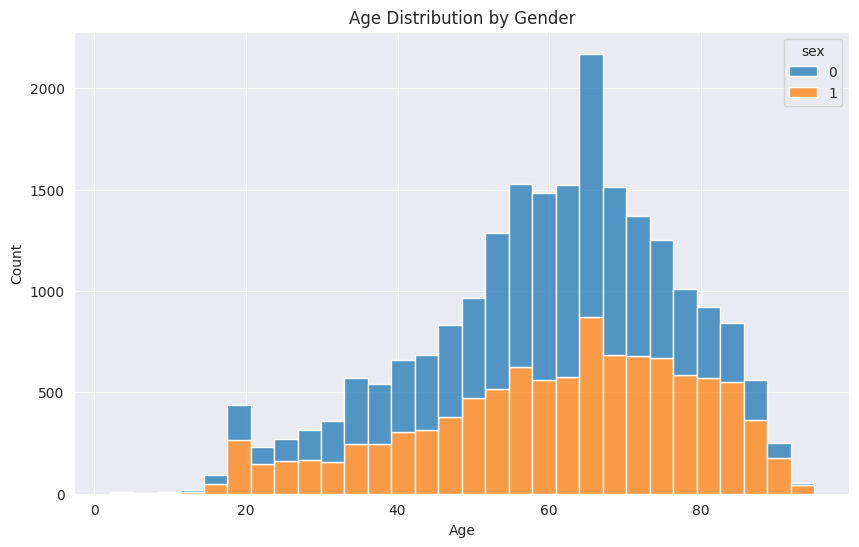

In [ ]:
# Print basic dataset statistics
print(f"Total number of ECG records: {len(df_meta)}")
print(f"Number of unique patients: {df_meta['patient_id'].nunique()}")
print("\nAge statistics:")
print(df_meta['age'].describe())
print("\nGender distribution:")
print(df_meta['sex'].value_counts().map({0: 'Female', 1: 'Male'}))

# Create age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_meta, x='age', bins=30, hue='sex', multiple="stack")
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## ECG Signal Visualization

In [ ]:
!pip install wfdb

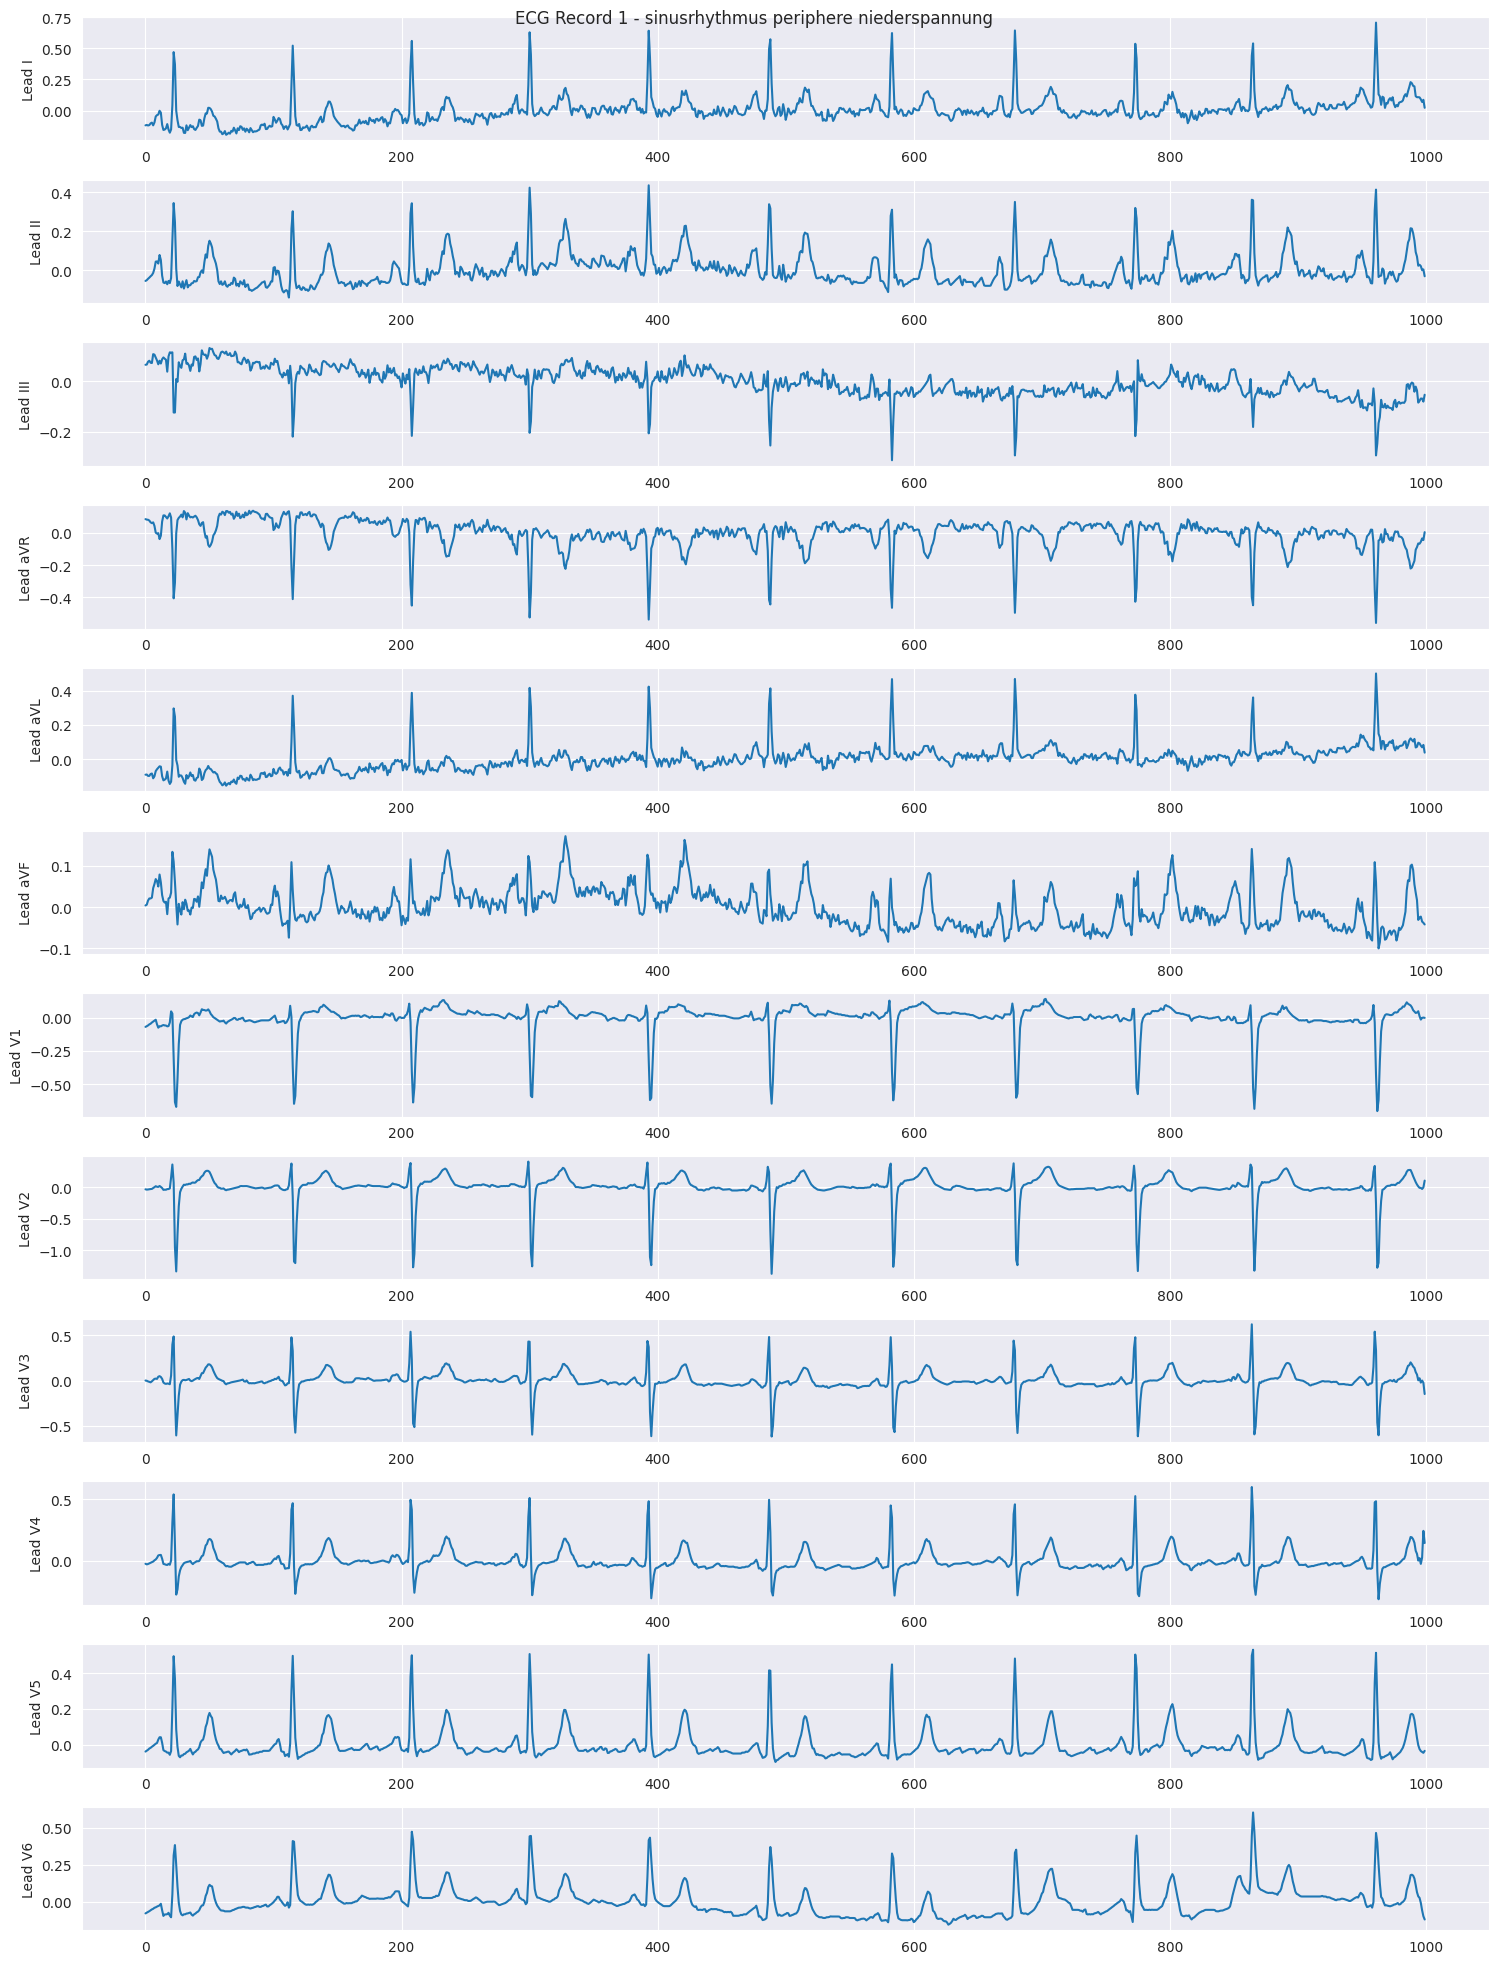

In [ ]:
import wfdb
import numpy as np

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
    return np.array([signal for signal, meta in data])

# Load first ECG record
first_record = df_meta.iloc[[0]]
X = load_raw_data(first_record, sampling_rate=100, path=DATA_PATH)

# Plot the ECG signals
n_leads = X.shape[2]  # number of leads
fig, axes = plt.subplots(n_leads, 1, figsize=(15, 20))
fig.suptitle(f'ECG Record {first_record.index[0]} - {first_record.report.values[0]}')

lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

for i in range(n_leads):
    axes[i].plot(X[0, :, i])
    axes[i].set_ylabel(f'Lead {lead_names[i]}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Read the PTB-XL database
df = pd.read_csv('/content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv')

# Identify columns with high percentage of missing values (>50%)
missing_percentages = (df.isnull().sum() / len(df)) * 100
high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()

# Additional columns to drop
additional_cols_to_drop = ['nurse', 'site', 'device', 'recording_date', 'validated_by']

# Combine all columns to drop
cols_to_drop = high_missing_cols + additional_cols_to_drop

print("Columns being dropped:")
print("-" * 40)
for col in cols_to_drop:
    if col in df.columns:
        print(f"{col}: {missing_percentages.get(col, 0):.2f}% missing")

# Drop specified columns
df_cleaned = df.drop(columns=cols_to_drop)

# Handle remaining missing values
# For numerical columns, fill with median
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

# For categorical columns, fill with mode
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(df_cleaned[categorical_columns].mode().iloc[0])

print("\nFinal Dataset Info:")
print("-" * 40)
print(df_cleaned.info())
print("\nSample of cleaned data:")
print("-" * 40)
print(df_cleaned.head())

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print("-" * 40)
print(df_cleaned.describe())

Columns being dropped:
----------------------------------------
height: 68.02% missing
weight: 56.82% missing
infarction_stadium1: 74.24% missing
infarction_stadium2: 99.53% missing
baseline_drift: 92.64% missing
static_noise: 85.06% missing
burst_noise: 97.19% missing
electrodes_problems: 99.86% missing
extra_beats: 91.05% missing
pacemaker: 98.66% missing
nurse: 6.91% missing
site: 0.08% missing
device: 0.00% missing
recording_date: 0.00% missing
validated_by: 43.10% missing

Final Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21837 non-null  int64  
 1   patient_id                    21837 non-null  float64
 2   age                           21837 non-null  float64
 3   sex                           21837 non-null  i

In [ ]:
# Generate .hea and .dat filenames and create a dataframe analysis
df_files = df_cleaned.copy()

# Create columns for different file types
df_files['hea_file_hr'] = df_files['filename_hr'].apply(lambda x: x + '.hea')
df_files['dat_file_hr'] = df_files['filename_hr'].apply(lambda x: x + '.dat')
df_files['hea_file_lr'] = df_files['filename_lr'].apply(lambda x: x + '.hea')
df_files['dat_file_lr'] = df_files['filename_lr'].apply(lambda x: x + '.dat')

# Display summary of file information
print("File Statistics:")
print("-" * 50)
print(f"Total number of records: {len(df_files)}")
print(f"Unique high-resolution records: {df_files['filename_hr'].nunique()}")
print(f"Unique low-resolution records: {df_files['filename_lr'].nunique()}")

# Display sample of file paths
print("\nSample of File Paths:")
print("-" * 50)
file_columns = ['filename_hr', 'hea_file_hr', 'dat_file_hr',
                'filename_lr', 'hea_file_lr', 'dat_file_lr']
print(df_files[file_columns].head())

# Basic file path structure analysis
print("\nFile Path Structure:")
print("-" * 50)
print("High-resolution file pattern:", df_files['filename_hr'].iloc[0])
print("Low-resolution file pattern:", df_files['filename_lr'].iloc[0])

File Statistics:
--------------------------------------------------
Total number of records: 21837
Unique high-resolution records: 21837
Unique low-resolution records: 21837

Sample of File Paths:
--------------------------------------------------
                 filename_hr                    hea_file_hr  \
0  records500/00000/00001_hr  records500/00000/00001_hr.hea   
1  records500/00000/00002_hr  records500/00000/00002_hr.hea   
2  records500/00000/00003_hr  records500/00000/00003_hr.hea   
3  records500/00000/00004_hr  records500/00000/00004_hr.hea   
4  records500/00000/00005_hr  records500/00000/00005_hr.hea   

                     dat_file_hr                filename_lr  \
0  records500/00000/00001_hr.dat  records100/00000/00001_lr   
1  records500/00000/00002_hr.dat  records100/00000/00002_lr   
2  records500/00000/00003_hr.dat  records100/00000/00003_lr   
3  records500/00000/00004_hr.dat  records100/00000/00004_lr   
4  records500/00000/00005_hr.dat  records100/00000/00005_l

In [ ]:
# Define normal ECG patterns
normal_patterns = [
    'normal',
    'normales',
    'sinusrhythmus',
    'regelrecht',
    'unauffällig',
    'no definite patholog'  # Added this pattern to normal cases
]

# Create pattern for filtering
pattern = '|'.join(normal_patterns)

# Remove rows with "trace only requested" first
df_filtered = df_cleaned[~df_cleaned['report'].str.contains('trace only requested', case=False, na=False)]

# Split records into normal and abnormal ECGs
normal_ecg = df_filtered[df_filtered['report'].str.contains(pattern, case=False)]
abnormal_ecg = df_filtered[~df_filtered['report'].str.contains(pattern, case=False)]

# Create comprehensive views
normal_ecg_files = normal_ecg.copy()
abnormal_ecg_files = abnormal_ecg.copy()

# Generate file paths for both sets
for df in [normal_ecg_files, abnormal_ecg_files]:
    df['hea_file_hr'] = df['filename_hr'].apply(lambda x: x + '.hea')
    df['dat_file_hr'] = df['filename_hr'].apply(lambda x: x + '.dat')
    df['hea_file_lr'] = df['filename_lr'].apply(lambda x: x + '.hea')
    df['dat_file_lr'] = df['filename_lr'].apply(lambda x: x + '.dat')

# Display summary statistics
print("ECG Records Summary:")
print("-" * 50)
print(f"Records removed (trace only): {len(df_cleaned) - len(df_filtered)}")
print(f"Total normal ECG records: {len(normal_ecg_files)}")
print(f"Total abnormal ECG records: {len(abnormal_ecg_files)}")
print(f"Normal ECG percentage: {(len(normal_ecg_files)/len(df_filtered)*100):.2f}%")
print(f"Abnormal ECG percentage: {(len(abnormal_ecg_files)/len(df_filtered)*100):.2f}%")

# Save normal ECG records to CSV
normal_output = '/content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/normal_ecg_records.csv'
normal_ecg_files.to_csv(normal_output, index=False)
print(f"\nNormal ECG records saved to: {normal_output}")

# Save abnormal ECG records to CSV
abnormal_output = '/content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/abnormal_ecg_records.csv'
abnormal_ecg_files.to_csv(abnormal_output, index=False)
print(f"Abnormal ECG records saved to: {abnormal_output}")

# Display samples of both categories
print("\nSample of Normal ECG Records:")
print("-" * 50)
columns_to_show = ['ecg_id', 'filename_hr', 'report']
print(normal_ecg_files[columns_to_show].head())

print("\nSample of Abnormal ECG Records:")
print("-" * 50)
print(abnormal_ecg_files[columns_to_show].head())

# Display basic diagnosis distribution for both categories
print("\nTop 5 Most Common Normal Diagnoses:")
print("-" * 50)
normal_diagnosis_counts = normal_ecg_files['report'].value_counts().head()
print(normal_diagnosis_counts)

print("\nTop 5 Most Common Abnormal Diagnoses:")
print("-" * 50)
abnormal_diagnosis_counts = abnormal_ecg_files['report'].value_counts().head()
print(abnormal_diagnosis_counts)

ECG Records Summary:
--------------------------------------------------
Records removed (trace only): 363
Total normal ECG records: 16543
Total abnormal ECG records: 4931
Normal ECG percentage: 77.04%
Abnormal ECG percentage: 22.96%

Normal ECG records saved to: /content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/normal_ecg_records.csv
Abnormal ECG records saved to: /content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/abnormal_ecg_records.csv

Sample of Normal ECG Records:
--------------------------------------------------
   ecg_id                filename_hr                                  report
0       1  records500/00000/00001_hr  sinusrhythmus periphere niederspannung
1       2  records500/00000/00002_hr     sinusbradykardie sonst normales ekg
2       3  records500/00000/00003_hr              sinusrhythmus normales ekg
3       4  records500/00000/00004_hr              sinusrhythmus normales ekg
4       5  records500

In [ ]:
!pip install timm

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler, Dataset
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import wfdb
from torch.nn import functional as F
import scipy
import timm 

# --- Placeholder Augmentation Classes ---
class RandomTimeWarp(nn.Module):
    def __init__(self, warp_limit=0.1):
        super().__init__()
        self.warp_limit = warp_limit

    def forward(self, signal):
        original_length = signal.shape[-1]
        warp_factor = 1 + np.random.uniform(-self.warp_limit, self.warp_limit)
        new_length = int(original_length * warp_factor)
        x_original = np.linspace(0, 1, original_length)
        x_new = np.linspace(0, 1, new_length)
        warped_signal = []
        for i in range(signal.shape[0]):
            f = np.interp(x_new, x_original, signal[i].cpu().numpy())
            warped_signal.append(f)
        warped_signal = np.stack(warped_signal)
        if new_length > original_length:
            warped_signal = warped_signal[:, :original_length]
        else:
            pad_size = original_length - new_length
            padding = np.zeros((signal.shape[0], pad_size))
            warped_signal = np.concatenate([warped_signal, padding], axis=1)
        return torch.tensor(warped_signal, dtype=torch.float)

class RandomShift(nn.Module):
    def __init__(self, shift_limit):
        super().__init__()
        self.shift_limit = shift_limit

    def forward(self, signal):
        shift = np.random.randint(-self.shift_limit, self.shift_limit+1)
        padded_signal = torch.nn.functional.pad(signal, (0, abs(shift)), 'constant', 0)
        if shift > 0:
            return padded_signal[:, :-shift]
        else:
            return padded_signal[:, abs(shift):]

class RandomScale(nn.Module):
    def __init__(self, scale_limit=0.1):
        super().__init__()
        self.scale_limit = scale_limit

    def forward(self, signal):
        scale_factor = 1 + np.random.uniform(-self.scale_limit, self.scale_limit)
        return signal * scale_factor

class AddGaussianNoise(nn.Module):
    def __init__(self, std=0.01):
        super().__init__()
        self.std = std

    def forward(self, signal):
        noise = torch.randn(signal.size()) * self.std
        return signal + noise

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

# --- ECGResNet model using seresnext101 ---
class ECGResNetSeresnext50(nn.Module):
    def __init__(self, num_classes=2, in_channels=12):
        super(ECGResNetSeresnext50, self).__init__()
        self.seresnext50 = timm.create_model('seresnext50_32x4d', pretrained=True, in_chans=in_channels)
        num_ftrs = self.seresnext50.fc.in_features
        self.seresnext50.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = x.unsqueeze(3)  # Add a dimension to represent 'width'
        x = self.seresnext50(x)
        return x

# --- Validation Function ---
def validate_model(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    predictions = []
    true_labels = []
    with torch.no_grad():
        for signals, labels in tqdm(val_loader, desc='Validation'):
            signals, labels = signals.to(device), labels.to(device)
            outputs = model(signals)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    from sklearn.metrics import classification_report, accuracy_score
    report = classification_report(
        true_labels,
        predictions,
        target_names=['Normal', 'Abnormal'],
        digits=4
    )
    print("\nDetailed Classification Report:")
    print(report)
    accuracy = accuracy_score(true_labels, predictions)
    return val_loss/len(val_loader), accuracy * 100

# --- Placeholder ECGDataset and Data Loading ---
class ECGDataset(Dataset):
    def __init__(self, df, root_path, target_length=4096, augment=None):
        self.df = df
        self.root_path = root_path
        self.target_length = target_length
        self.augment = augment

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        file_path = os.path.join(self.root_path, row['filename_hr'])
        try:
            record = wfdb.rdrecord(file_path)
            signals = record.p_signal.T  # Transpose to get (12, signal_length)
            signals = torch.tensor(signals, dtype=torch.float32)

            if signals.shape[1] < self.target_length:
                pad_size = self.target_length - signals.shape[1]
                signals = torch.cat([signals, torch.zeros((12, pad_size))], dim=1)
            elif signals.shape[1] > self.target_length:
                start_index = random.randint(0, signals.shape[1] - self.target_length)
                signals = signals[:, start_index:start_index + self.target_length]

            label = torch.tensor(row['is_abnormal'], dtype=torch.long)
            if self.augment:
                signals = self.augment(signals)
            return signals, label
        except Exception as e:
             print(f"Error loading record {idx} at {file_path}: {e}")
             # Return a zero tensor with the target shape
             return torch.zeros((12, self.target_length)), torch.tensor(-1)

# --- Main Training Pipeline ---
def main():
    root_path = '/content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'
    batch_size = 32
    num_epochs = 30  # Increased epochs
    learning_rate = 0.0001 # Reduced learning rate
    patience = 7 # Increased patience
    start_epoch = 5

    # Load original, imbalanced dataset
    normal_df = pd.read_csv(f"{root_path}/normal_ecg_records.csv")
    abnormal_df = pd.read_csv(f"{root_path}/abnormal_ecg_records.csv")
    normal_df['is_abnormal'] = 0
    abnormal_df['is_abnormal'] = 1
    combined_df = pd.concat([normal_df, abnormal_df])

    # Split data with stratification
    train_df, test_df = train_test_split(combined_df, test_size=0.2,
                                         stratify=combined_df['is_abnormal'],
                                         random_state=42)
    train_df, val_df = train_test_split(train_df, test_size=0.2,
                                        stratify=train_df['is_abnormal'],
                                        random_state=42)

    # Data Augmentations
    class RandomAmplitudeScale(nn.Module):
        def __init__(self, scale_limit=0.15): 
            super().__init__()
            self.scale_limit = scale_limit

        def forward(self, signals):
            scale_factor = 1.0 + (torch.rand(1) * 2 - 1) * self.scale_limit
            return signals * scale_factor

    train_augment = nn.Sequential(
        RandomTimeWarp(warp_limit=0.15), 
        RandomShift(shift_limit=250), 
        RandomScale(scale_limit=0.15), 
        AddGaussianNoise(std=0.015), 
        RandomAmplitudeScale(scale_limit=0.15) 
    )

    # Create data loaders
    train_dataset = ECGDataset(train_df, root_path, augment=train_augment, target_length=4096)
    val_dataset = ECGDataset(val_df, root_path, target_length=4096)
    test_dataset = ECGDataset(test_df, root_path, target_length=4096)

    # Calculate weights for WeightedRandomSampler
    train_labels = train_df['is_abnormal'].values
    class_sample_counts = np.bincount(train_labels)
    weights = 1. / class_sample_counts
    samples_weights = torch.FloatTensor(weights[train_labels])

    sampler = WeightedRandomSampler(samples_weights, len(samples_weights))

    train_loader = DataLoader(train_dataset, batch_size=batch_size,
                              sampler=sampler, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size,
                            num_workers=2, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size,
                             num_workers=2, pin_memory=True)

    # Model, optimizer, scheduler, and loss function
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = ECGResNetSeresnext50(num_classes=2, in_channels=12).to(device)
    criterion = FocalLoss(alpha=0.25, gamma=2)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=patience, verbose=True)

    # Training loop
    scaler = GradScaler() # Initialize GradScaler
    best_val_loss = float('inf') # To track best validation loss for LR scheduler
    patience_counter = 0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for signals, labels in progress_bar:
            signals, labels = signals.to(device), labels.to(device)
            optimizer.zero_grad()
            with autocast():
                outputs = model(signals)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
            progress_bar.set_postfix({
                'loss': f'{train_loss/train_total:.4f}', # Note: This loss is per sample now
                'acc': f'{100.*train_correct/train_total:.2f}%'
            })
        val_loss, val_acc = validate_model(model, val_loader, criterion, device)

        # Step the LR scheduler based on validation loss
        scheduler.step(val_loss)

        if epoch + 1 > start_epoch:
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'\nEarly stopping triggered after epoch {epoch+1}')
                    break
        print(f'\nEpoch {epoch+1} Summary:')
        print(f'Train Loss: {train_loss/len(train_loader):.4f}') # This is loss per batch
        print(f'Train Accuracy: {100.*train_correct/train_total:.2f}%')
        print(f'Val Loss: {val_loss:.4f}')
        print(f'Val Accuracy: {val_acc:.2f}%\n')

    # Save the model
    model_path = os.path.join(root_path, 'ecg_seresnext101_classifier.pth')
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict() # Save scheduler state as well
    }, model_path)
    print(f"\nModel saved to: {model_path}")

if __name__ == "__main__":
    main()

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
<ipython-input-13-31302dd1a6cb>:239: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() # Initialize GradScaler
Epoch 1/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.73it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9640    0.1519    0.2624      2647
    Abnormal     0.2564    0.9810    0.4065       789

    accuracy                         0.3423      3436
   macro avg     0.6102    0.5664    0.3345      3436
weighted avg     0.8015    0.3423    0.2955      3436


Epoch 1 Summary:
Train Loss: 0.0335
Train Accuracy: 73.70%
Val Loss: 0.0806
Val Accuracy: 34.23%



Epoch 2/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.80it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9355    0.4605    0.6172      2647
    Abnormal     0.3305    0.8935    0.4825       789

    accuracy                         0.5600      3436
   macro avg     0.6330    0.6770    0.5499      3436
weighted avg     0.7966    0.5600    0.5863      3436


Epoch 2 Summary:
Train Loss: 0.0301
Train Accuracy: 77.65%
Val Loss: 0.0554
Val Accuracy: 56.00%



Epoch 3/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:14<00:00,  7.71it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9568    0.4095    0.5735      2647
    Abnormal     0.3213    0.9379    0.4787       789

    accuracy                         0.5308      3436
   macro avg     0.6390    0.6737    0.5261      3436
weighted avg     0.8108    0.5308    0.5518      3436


Epoch 3 Summary:
Train Loss: 0.0265
Train Accuracy: 81.56%
Val Loss: 0.0577
Val Accuracy: 53.08%



Epoch 4/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.80it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9379    0.5474    0.6913      2647
    Abnormal     0.3665    0.8783    0.5172       789

    accuracy                         0.6234      3436
   macro avg     0.6522    0.7129    0.6042      3436
weighted avg     0.8067    0.6234    0.6513      3436


Epoch 4 Summary:
Train Loss: 0.0246
Train Accuracy: 83.33%
Val Loss: 0.0450
Val Accuracy: 62.34%



Epoch 5/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.82it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9418    0.4953    0.6492      2647
    Abnormal     0.3464    0.8973    0.4998       789

    accuracy                         0.5876      3436
   macro avg     0.6441    0.6963    0.5745      3436
weighted avg     0.8051    0.5876    0.6149      3436


Epoch 5 Summary:
Train Loss: 0.0227
Train Accuracy: 84.66%
Val Loss: 0.0490
Val Accuracy: 58.76%



Epoch 6/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.86it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9574    0.4420    0.6048      2647
    Abnormal     0.3329    0.9341    0.4908       789

    accuracy                         0.5550      3436
   macro avg     0.6452    0.6881    0.5478      3436
weighted avg     0.8140    0.5550    0.5786      3436


Epoch 6 Summary:
Train Loss: 0.0197
Train Accuracy: 87.32%
Val Loss: 0.0706
Val Accuracy: 55.50%



Epoch 7/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.87it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9386    0.5021    0.6542      2647
    Abnormal     0.3475    0.8897    0.4998       789

    accuracy                         0.5911      3436
   macro avg     0.6430    0.6959    0.5770      3436
weighted avg     0.8028    0.5911    0.6187      3436


Epoch 7 Summary:
Train Loss: 0.0185
Train Accuracy: 88.31%
Val Loss: 0.0612
Val Accuracy: 59.11%



Epoch 8/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:14<00:00,  7.68it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9394    0.6320    0.7556      2647
    Abnormal     0.4115    0.8631    0.5573       789

    accuracy                         0.6851      3436
   macro avg     0.6754    0.7476    0.6565      3436
weighted avg     0.8181    0.6851    0.7101      3436


Epoch 8 Summary:
Train Loss: 0.0162
Train Accuracy: 90.07%
Val Loss: 0.0531
Val Accuracy: 68.51%



Epoch 9/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.84it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9255    0.6339    0.7525      2647
    Abnormal     0.4030    0.8289    0.5423       789

    accuracy                         0.6787      3436
   macro avg     0.6642    0.7314    0.6474      3436
weighted avg     0.8055    0.6787    0.7042      3436


Epoch 9 Summary:
Train Loss: 0.0149
Train Accuracy: 90.72%
Val Loss: 0.0546
Val Accuracy: 67.87%



Epoch 10/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.87it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9049    0.6902    0.7831      2647
    Abnormal     0.4213    0.7567    0.5413       789

    accuracy                         0.7055      3436
   macro avg     0.6631    0.7234    0.6622      3436
weighted avg     0.7939    0.7055    0.7276      3436


Epoch 10 Summary:
Train Loss: 0.0127
Train Accuracy: 92.60%
Val Loss: 0.0535
Val Accuracy: 70.55%



Epoch 11/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.77it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9096    0.7299    0.8099      2647
    Abnormal     0.4550    0.7567    0.5683       789

    accuracy                         0.7360      3436
   macro avg     0.6823    0.7433    0.6891      3436
weighted avg     0.8052    0.7360    0.7544      3436


Epoch 11 Summary:
Train Loss: 0.0114
Train Accuracy: 93.19%
Val Loss: 0.0544
Val Accuracy: 73.60%



Epoch 12/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.86it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9132    0.7389    0.8169      2647
    Abnormal     0.4660    0.7643    0.5790       789

    accuracy                         0.7448      3436
   macro avg     0.6896    0.7516    0.6979      3436
weighted avg     0.8105    0.7448    0.7622      3436


Epoch 12 Summary:
Train Loss: 0.0103
Train Accuracy: 94.22%
Val Loss: 0.0598
Val Accuracy: 74.48%



Epoch 13/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.79it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9171    0.7476    0.8237      2647
    Abnormal     0.4773    0.7731    0.5902       789

    accuracy                         0.7535      3436
   macro avg     0.6972    0.7604    0.7070      3436
weighted avg     0.8161    0.7535    0.7701      3436


Epoch 13 Summary:
Train Loss: 0.0078
Train Accuracy: 96.02%
Val Loss: 0.0573
Val Accuracy: 75.35%



Epoch 14/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.76it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9116    0.7480    0.8217      2647
    Abnormal     0.4723    0.7567    0.5816       789

    accuracy                         0.7500      3436
   macro avg     0.6920    0.7523    0.7017      3436
weighted avg     0.8107    0.7500    0.7666      3436


Epoch 14 Summary:
Train Loss: 0.0058
Train Accuracy: 96.99%
Val Loss: 0.0607
Val Accuracy: 75.00%



Epoch 15/30:   0%|          | 0/430 [00:00<?, ?it/s]<ipython-input-13-31302dd1a6cb>:251: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Validation: 100%|██████████| 108/108 [00:13<00:00,  7.93it/s]



Detailed Classification Report:
              precision    recall  f1-score   support

      Normal     0.9091    0.8005    0.8513      2647
    Abnormal     0.5222    0.7313    0.6093       789

    accuracy                         0.7846      3436
   macro avg     0.7156    0.7659    0.7303      3436
weighted avg     0.8202    0.7846    0.7958      3436


Early stopping triggered after epoch 15

Model saved to: /content/ptbxl/1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ecg_seresnext101_classifier.pth
